In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### The Normal Equation

Text(0, 0.5, 'y')

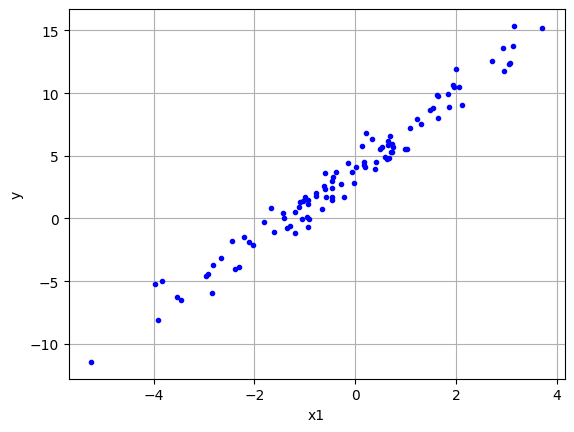

In [2]:
# Generate some linear-looking data to test this equation
np.random.seed(42)
m = 100
X = 2 * np.random.randn(m, 1)  # column vector
y = 4 + 3 * X + np.random.randn(m, 1)  # column vector
plt.plot(X, y, 'b.')
plt.grid()
plt.xlabel("x1")
plt.ylabel("y")

In [3]:
# Compute the optimal solution using the Normal equation
from sklearn.preprocessing import add_dummy_feature
X_b = add_dummy_feature(X)  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
theta_best

array([[4.00742783],
       [2.92837142]])

In [4]:
# make predictions using theta_best
X_new = np.array([[0], [2]])
X_new_b = add_dummy_feature(X_new)  # add x0 = 1 to each instance
y_predict = X_new_b @ theta_best
y_predict

array([[4.00742783],
       [9.86417067]])

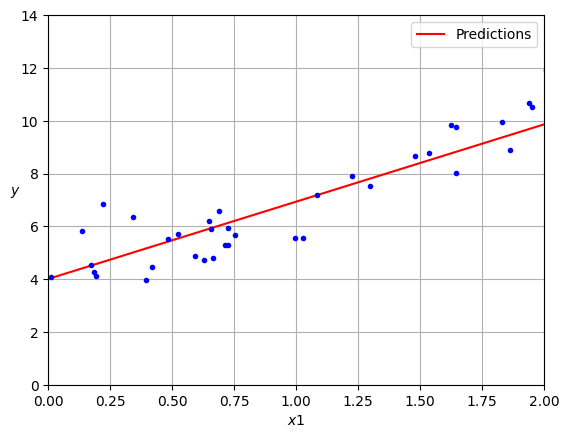

In [5]:
plt.plot(X_new, y_predict, "r-", label="Predictions")
plt.plot(X, y, "b.")
plt.grid()
plt.xlabel("$x1$")
plt.ylabel("$y$", rotation=0)
plt.xlim(0., 2.)
plt.ylim(0., 14.)
plt.legend()

In [6]:
# Linear Regression using Scikit-Learn
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.00742783]), array([[2.92837142]]))

In [7]:
lin_reg.predict(X_new)

array([[4.00742783],
       [9.86417067]])

In [8]:
# Computing the solution using SVD is more efficient than the Normal Equation and handles some
# edge cases where the Normal Equation may not work
# Using least squares (which LinearRegression is based on) directly
# This function computes theta_best = X^+ @ y (X^+ = the pseudo-inverse of X)
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.00742783],
       [2.92837142]])

In [9]:
# Compute the pseudo-inverse of X directly and multiply by y
np.linalg.pinv(X_b) @ y

array([[4.00742783],
       [2.92837142]])

### Gradient Descent

In [10]:
# Quick implementation of Batch (Full) Gradient Descent
eta = 0.1  # learning rate
n_epochs = 1000
m = len(X_b)  # number of instances
np.random.seed(42)
theta = np.random.randn(2, 1)  # randomly initialized model parameters

for epoch in range(n_epochs):
    gradients = 2 / m * X_b.T @ (X_b @ theta - y)
    theta = theta - eta * gradients

theta

array([[4.00742783],
       [2.92837142]])

In [11]:
# Stochastic gradient descent with a simple learning schedule.
# By convention, we iterate by rounds of m iterations: each round is called an epoch.
# Batch Gradient Descent iterated 1000 times through the whole training set
# (actually, it used the whole training set 1000 times)
# Stochastic gradient descent goes through the training set only 50 times
# (at every step, picks a random instance until it goes through the whole set
# and this is repeated 50 times. But the calculations are minimal at every step -> very fast)
# Also, note that at every step it picks an instance randomly, so some instances may never get picked
n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

np.random.seed(42)
theta = np.random.randn(2, 1)  # random initialization

for epoch in range(n_epochs):
    for iteration in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index : random_index + 1]
        yi = y[random_index : random_index + 1]
        gradients = 2 * xi.T @ (xi @ theta - yi) # for SGD, do not divide by m
        eta = learning_schedule(epoch * m + iteration)
        theta = theta - eta * gradients

theta


array([[4.04913598],
       [2.93329854]])

In [15]:
# Stochastic Gradient Descent using Scikit-Learn
from sklearn.linear_model import SGDRegressor

# Runs for maximum 1000 epochs or until the loss drops by less than 10^-5
# during 100 epochs. It starts with a learning rate of 0.01 using the default
# learning schedule. It does not use any regularization
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-5, penalty=None, eta0=0.01,
                       n_iter_no_change=100, random_state=42)
sgd_reg.fit(X, y.ravel())  # y.ravel() because fit() expects 1D targets
sgd_reg.intercept_, sgd_reg.coef_

(array([4.0080759]), array([2.9297113]))

In [14]:
print(y.shape)
print(y.ravel().shape)

(100, 1)
(100,)


### Polynomial regression

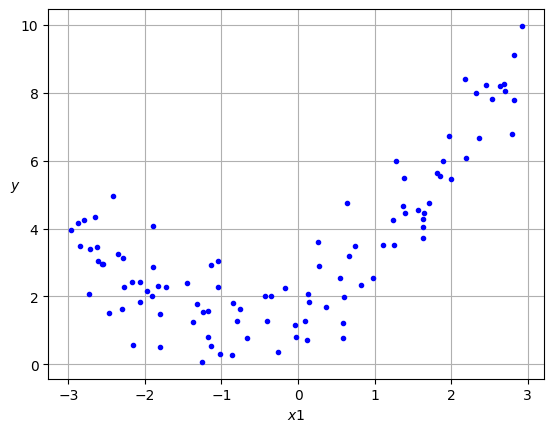

In [17]:
np.random.seed(42)
m = 100  # number of instances
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)
plt.plot(X, y, 'b.')
plt.xlabel('$x$1')
plt.ylabel('$y$', rotation=0)
plt.grid()

In [18]:
# Use sklearn's PolynomialFeatures to add the square of X as a new feature
from sklearn.preprocessing import PolynomialFeatures

# We set include_bias=False, maybe because we will use this set with 
# sklearn's LinearRegression and it does this automatically?
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
print(X[0])
print(X_poly[0])

[-0.75275929]
[-0.75275929  0.56664654]


In [19]:
X[0] ** 2

array([0.56664654])

In [20]:
# Fit a LinearRegression Model to the extended training data.
# Fitted: y_hat = 0.56 * x1^2 + 0.93 * x1 + 1.78
# Actual: y = 0.5 * x1^2 + 1.0 * x1 + 2.0 + Gaussian Noise
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

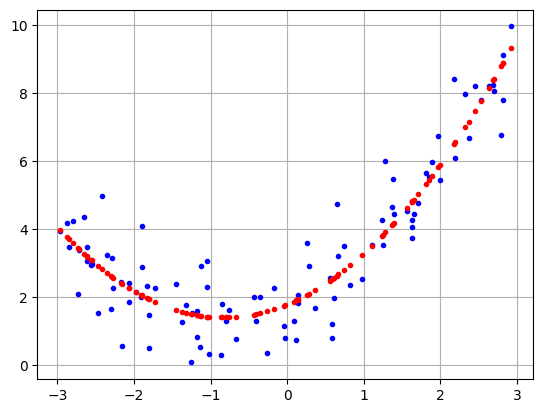

In [28]:
y_pred = lin_reg.predict(X_poly)
plt.plot(X, y, 'b.')
plt.plot(X, y_pred, 'r.')
plt.grid()

Text(0, 0.5, 'RMSE')

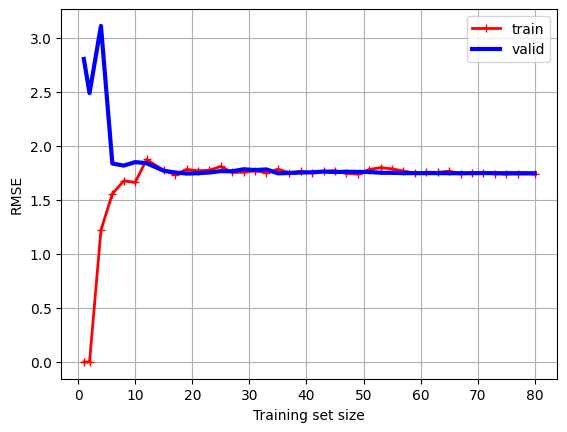

In [30]:
# Learning curves of the linear regression model.
# They show the training and validation error at increasing sizes of the training set.
# It's a way to determine underfitting / overfitting
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(
    LinearRegression(), X, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
    scoring="neg_root_mean_squared_error"
)
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")
plt.grid()
plt.legend()
plt.xlabel("Training set size")
plt.ylabel("RMSE")

This model is underfitting: Both curves have reached a plateau, they are close and fairly high.

(0.0, 2.5)

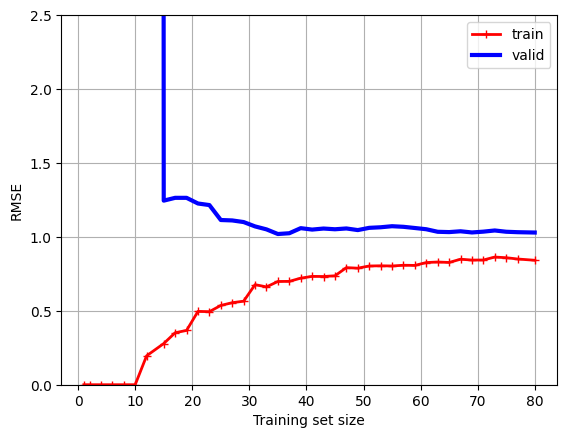

In [32]:
# Learning curves of a 10h-degree polynomial model, for comparison
from sklearn.pipeline import make_pipeline

polynomial_regression = make_pipeline(
    PolynomialFeatures(degree=10, include_bias=False),
    LinearRegression()
)

train_sizes, train_scores, valid_scores = learning_curve(
    polynomial_regression, X, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
    scoring="neg_root_mean_squared_error"
)
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")
plt.grid()
plt.legend()
plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.ylim(0.0, 2.5)

The model performs better on the training data than on the validation data, therefore it is overfitting. If we kept adding training data, the two curves would get closer.

Bias / Variance trade-off:
The generalization error is the sum of three very different components:
- Bias: Wrong assumptions (e.g. assuming a linear model for quadratic data) -> Underfitting
- Variance: Sensitivity to small variations in the training data -> Overfitting
- Irreducible error: Due to the noisiness of the data itself -> Clean the data

### Regularization

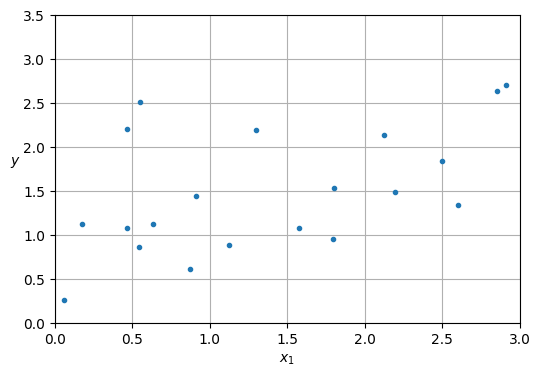

In [37]:
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

plt.figure(figsize=(6, 4))
plt.plot(X, y, ".")
plt.xlabel("$x_1$")
plt.ylabel("$y$  ", rotation=0)
plt.axis([0, 3, 0, 3.5])
plt.grid()

In [36]:
# Ridge regression with sklearn using closed-form solution!
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=0.1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55325833]])

In [38]:
# Ridge regression with gradient descent
sgd_reg = SGDRegressor(penalty="l2", alpha=0.1 / m, tol=None,
                       max_iter=1000, eta0=0.01, random_state=42)
sgd_reg.fit(X, y.ravel())  # y.ravel() because fit() expects 1D targets
sgd_reg.predict([[1.5]])

array([1.55302613])

In [39]:
# Alterantive with Ridge class
ridge_sgd_reg = Ridge(alpha=0.1, solver="sag")  # sag => Stochastic average GD ( SGD variant)
ridge_sgd_reg.fit(X, y)
ridge_sgd_reg.predict([[1.5]])

array([[1.55327639]])

In [40]:
# RidgeCV
from sklearn.linear_model import RidgeCV

ridge_cv = RidgeCV(alphas=(0.1, 1.0, 10.0), cv=3)
ridge_cv.fit(X, y)

RidgeCV(cv=3)

In [41]:
ridge_cv.best_score_

0.13364748571111215

In [42]:
ridge_cv.alpha_

1.0

In [43]:
ridge_cv.coef_, ridge_cv.intercept_

(array([[0.36280369]]), array([1.00650911]))

In [44]:
# Lasso regression
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)  # or SGDRegressor(penalty="l1", alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([1.53788174])

In [45]:
# Elastic Net (mix of Lasso and Ridge)
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([1.54333232])

In [47]:
np.exp(-1)

0.36787944117144233

In [48]:
np.log(0.5), np.log(0.1), np.log(0.01)

(-0.6931471805599453, -2.3025850929940455, -4.605170185988091)

### Logistic regression

In [49]:
# Build a binary classifier based on Logistic Regression to detect Iris virginica 
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)
list(iris)

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [50]:
iris.data.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [51]:
iris.target.head(3)

0    0
1    0
2    0
Name: target, dtype: int64

In [52]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [53]:
# Split the data and train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

X = iris.data[["petal width (cm)"]].values
y = iris.target_names[iris.target] == 'virginica'
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [60]:
# Are the splits stratified?
print(np.count_nonzero(y) / y.size)
print(np.count_nonzero(y_train) / y_train.size)
print(np.count_nonzero(y_test) / y_test.size)

0.3333333333333333
0.3392857142857143
0.3157894736842105


In [61]:
# Out of curiosity, let's try the split again with stratification enabled
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                    random_state=42)

In [62]:
print(np.count_nonzero(y) / y.size)
print(np.count_nonzero(y_train) / y_train.size)
print(np.count_nonzero(y_test) / y_test.size)

0.3333333333333333
0.33035714285714285
0.34210526315789475


In [63]:
# Let's go with this split for now and train the model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=42)

Text(0, 0.5, 'probability')

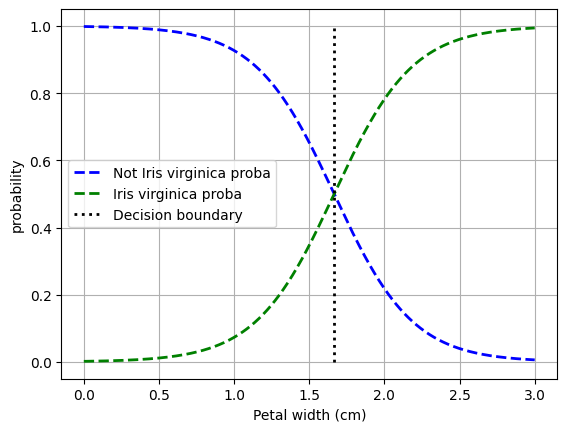

In [66]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)  # reshape to get a column vector
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0, 0] # we get the first one because X_new is sorted to begin with

plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2,
         label="Not Iris virginica proba")
plt.plot(X_new, y_proba[:, 1], "g--", linewidth=2, label="Iris virginica proba")
plt.plot([decision_boundary, decision_boundary], [0, 1], "k:", linewidth=2,
         label="Decision boundary")
plt.grid()
plt.legend()
plt.xlabel("Petal width (cm)")
plt.ylabel("probability")

In [70]:
decision_boundary

1.6666666666666667

In [72]:
log_reg.predict([[1.7], [1.5]])

array([ True, False])

In [74]:
log_reg.coef_, log_reg.intercept_

(array([[3.81506159]]), array([-6.35354436]))

In [80]:
print(1 / (1 + np.exp(log_reg.intercept_[0] + log_reg.coef_[0,0] * 1.7)))
print(log_reg.predict_proba([[1.7]]))

0.467032811788345
[[0.46703281 0.53296719]]


### Softmax regression

In [81]:
# Use softmax regression to classify the iris dataset into all three classes
# Use only two of the features
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)  # stratification?

softmax_reg = LogisticRegression(C=30, random_state=42)
softmax_reg.fit(X_train, y_train)

LogisticRegression(C=30, random_state=42)

In [83]:
softmax_reg.predict([[5, 2]])

array([2])

In [84]:
softmax_reg.predict_proba([[5, 2]]).round(2)

array([[0.  , 0.04, 0.96]])

In [85]:
iris.target_names[softmax_reg.predict_proba([[5, 2]]).argmax()]

'virginica'